In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

DATA_PATH = "../datasets/"

LEVEL = 500

MAX_VALUE = 58000
MIN_VALUE = 56000

MATTHEW_DATE = '20161005'
MATTHEW_LON = 290
MATTHEW_LAT = 4

HERMINE_DATE = '20160906'
HERMINE_LON = 280
HERMINE_LAT = 25

In [2]:
# Dataset1: --variable=geopotential --level_type=pressure --years=2016 --resolution=0.5 --time=00:00 --pressure_level 10 50 100 200 300 400 500 700 850 925 1000
dataset1 = xr.open_dataset(f"{DATA_PATH}dataset1.nc")
dataset1

<xarray.Dataset>
Dimensions:    (longitude: 720, latitude: 361, level: 11, time: 366)
Coordinates:
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * latitude   (latitude) float32 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * level      (level) int32 10 50 100 200 300 400 500 700 850 925 1000
  * time       (time) datetime64[ns] 2016-01-01 2016-01-02 ... 2016-12-31
Data variables:
    z          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-14 13:32:35 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
# Dataset1 compressed (1,047x): --nepoches=20 --all --quantizing --width=256
dataset1_comp = xr.open_dataset(f"{DATA_PATH}dataset1_w256.nc")
dataset1_comp

<xarray.Dataset>
Dimensions:    (longitude: 720, time: 366, level: 11, latitude: 361)
Coordinates:
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * time       (time) datetime64[ns] 2016-01-01 2016-01-02 ... 2016-12-31
  * latitude   (latitude) float32 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * level      (level) int32 10 50 100 200 300 400 500 700 850 925 1000
Data variables:
    z          (time, level, latitude, longitude) float32 ...

In [4]:
def plot_map(dataset, date, pressure_level, orthographic=False, lon=42, lat=4):

    fig = plt.figure(figsize=[20,10])

    if orthographic:
       ax = fig.add_subplot(111, projection = ccrs.Orthographic(central_longitude=lon, central_latitude=lat))
    else:
        ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))

    dataset['z'].sel(time=date, level=pressure_level).plot(ax=ax, cmap='jet', vmax=MAX_VALUE, vmin=MIN_VALUE, transform=ccrs.PlateCarree())

    ax.coastlines()
    plt.show()

### Hurricane Matthew - 05.10.2016

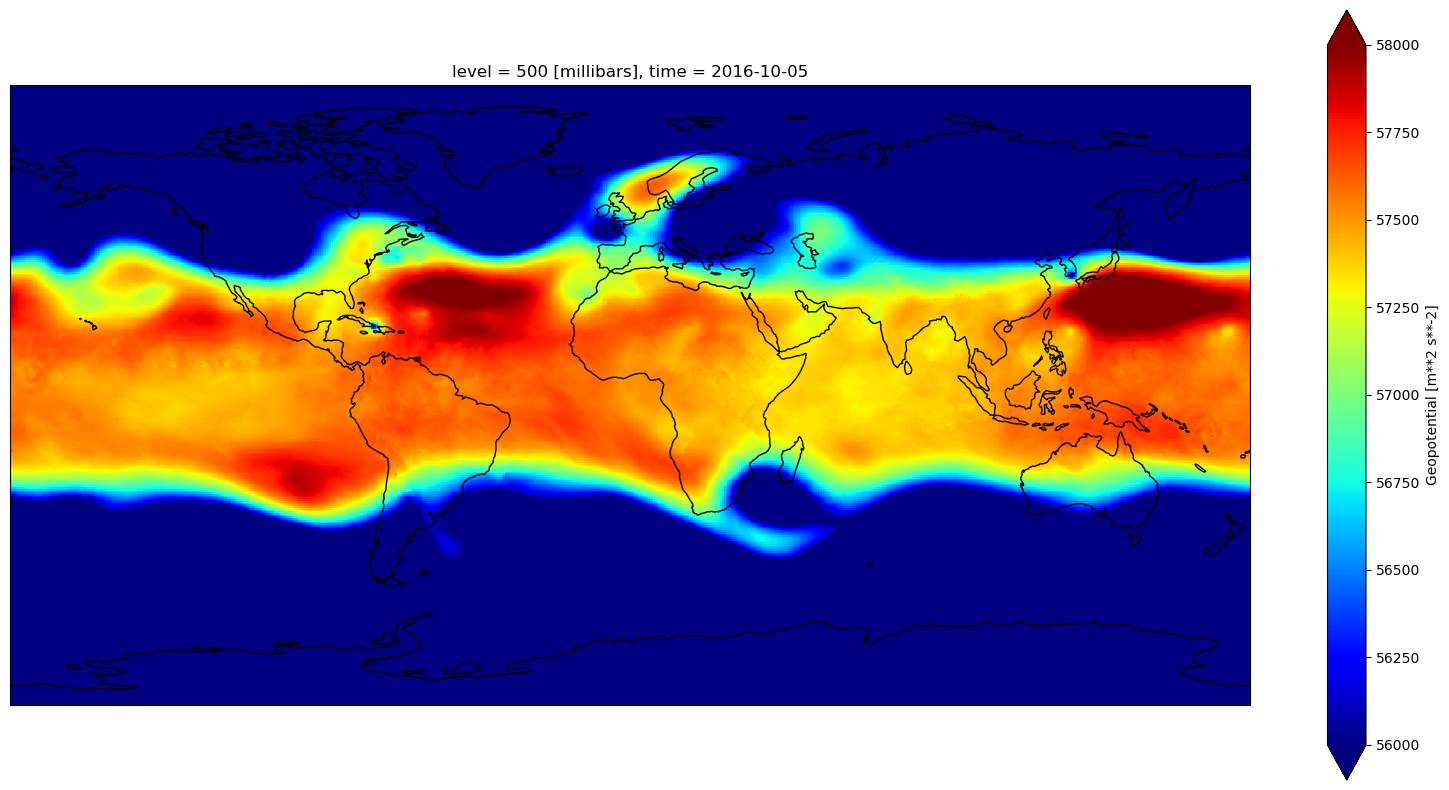

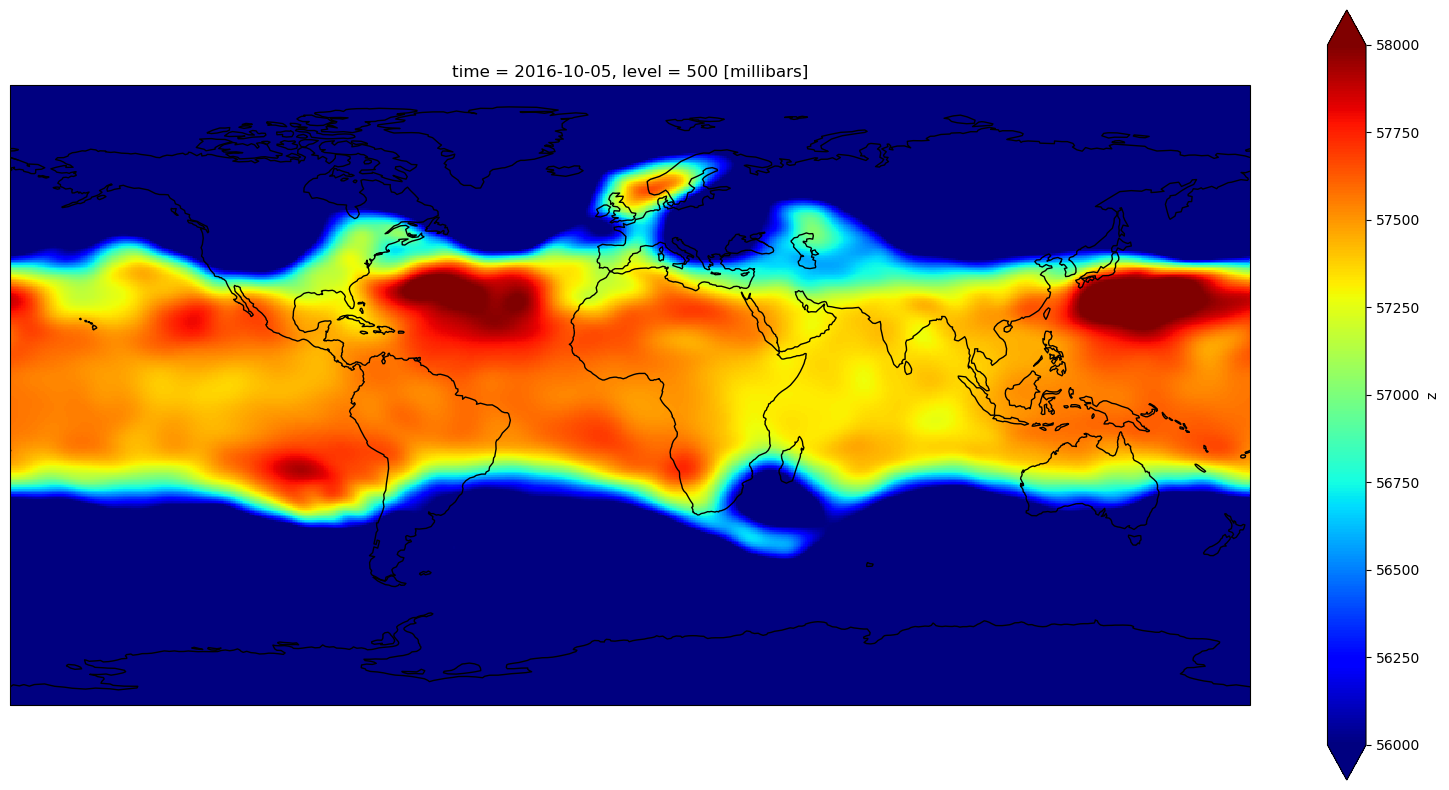

In [5]:
plot_map(dataset1, MATTHEW_DATE, LEVEL)
plot_map(dataset1_comp, MATTHEW_DATE, LEVEL)

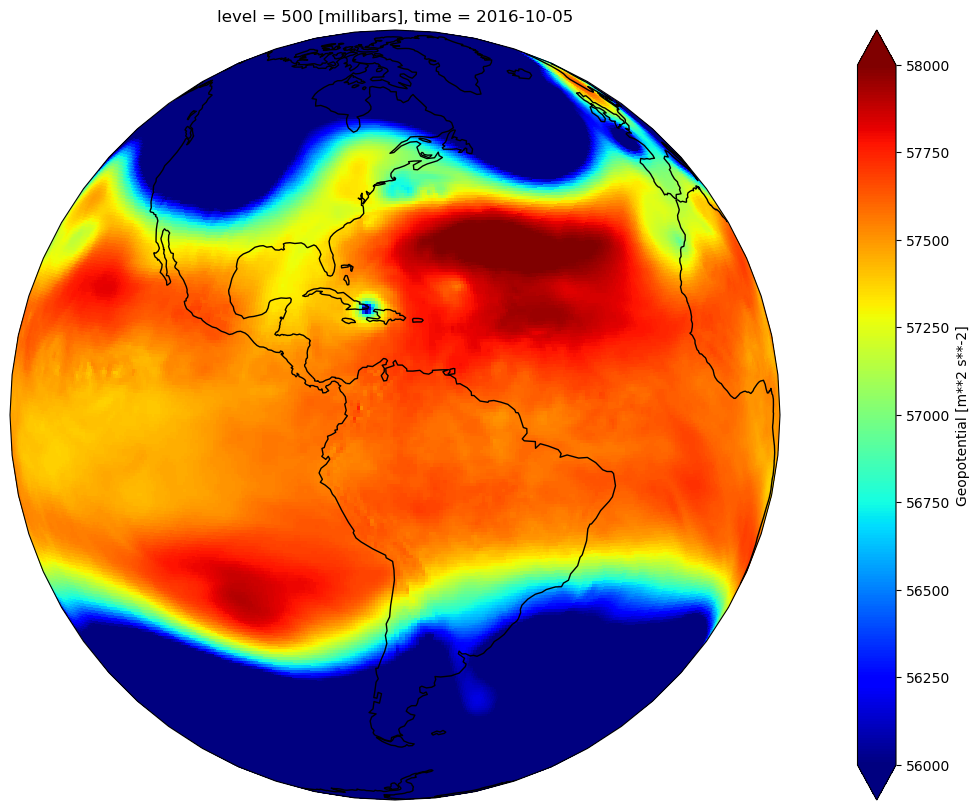

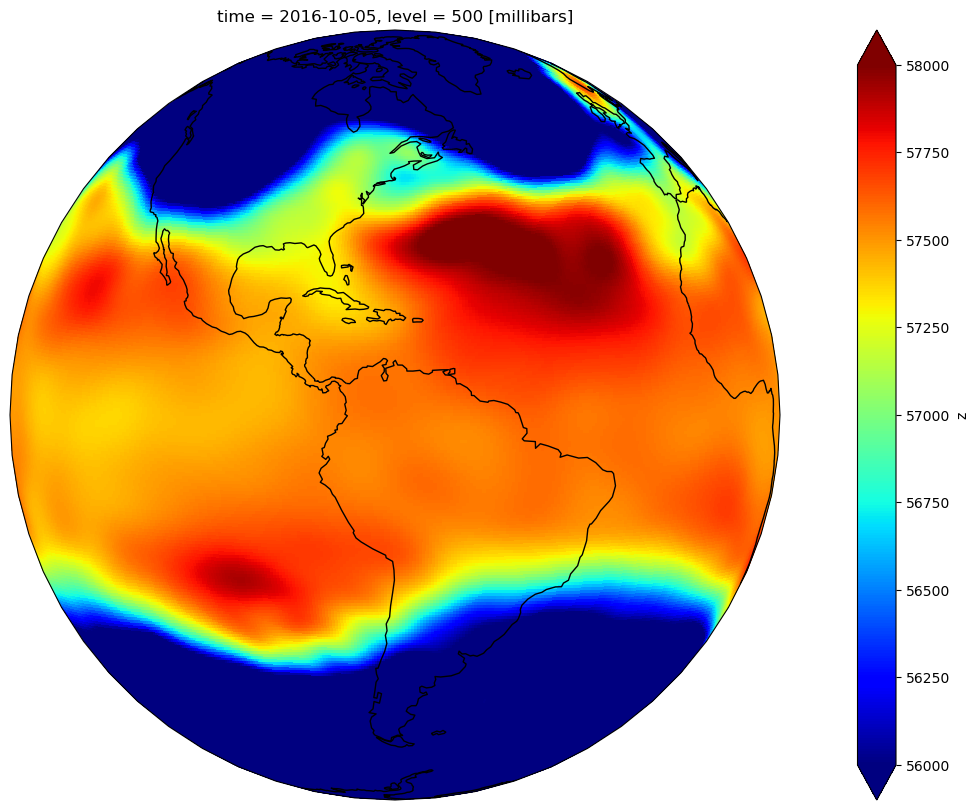

In [6]:
plot_map(dataset1, MATTHEW_DATE, LEVEL, orthographic=True, lon=MATTHEW_LON, lat=MATTHEW_LAT)
plot_map(dataset1_comp, MATTHEW_DATE, LEVEL, orthographic=True, lon=MATTHEW_LON, lat=MATTHEW_LAT)

### Hurricane Hermine - 06.09.2016

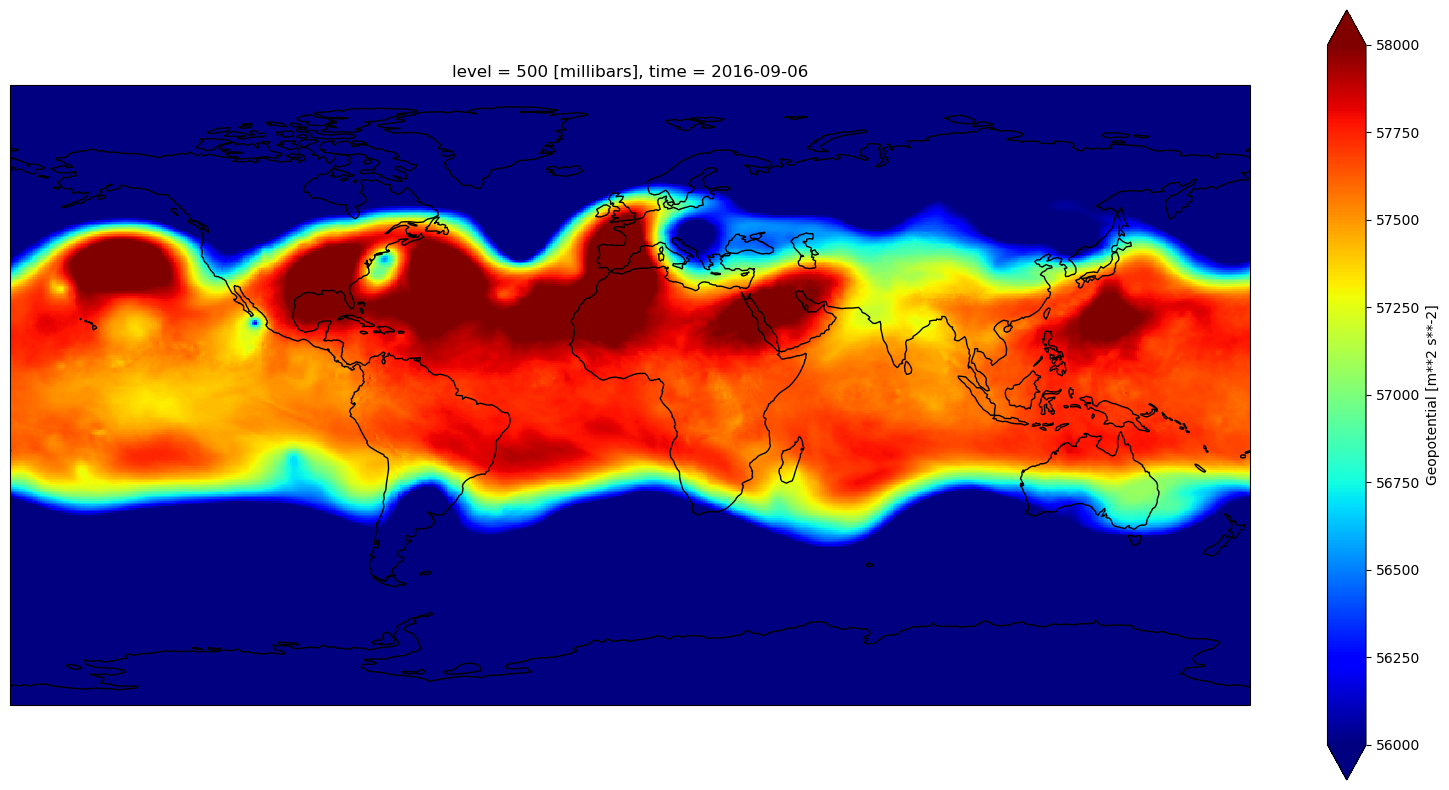

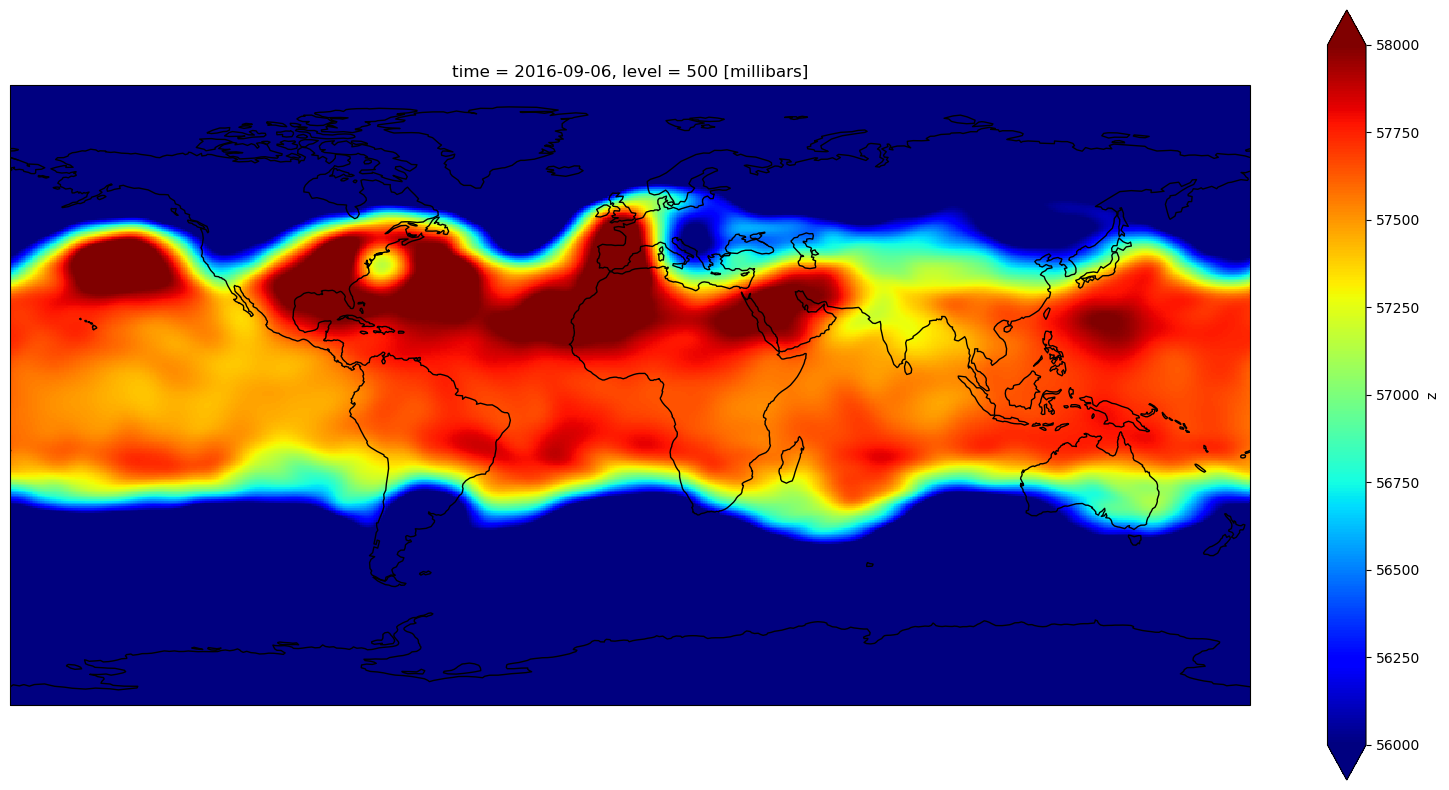

In [7]:
plot_map(dataset1, HERMINE_DATE, LEVEL)
plot_map(dataset1_comp, HERMINE_DATE, LEVEL)

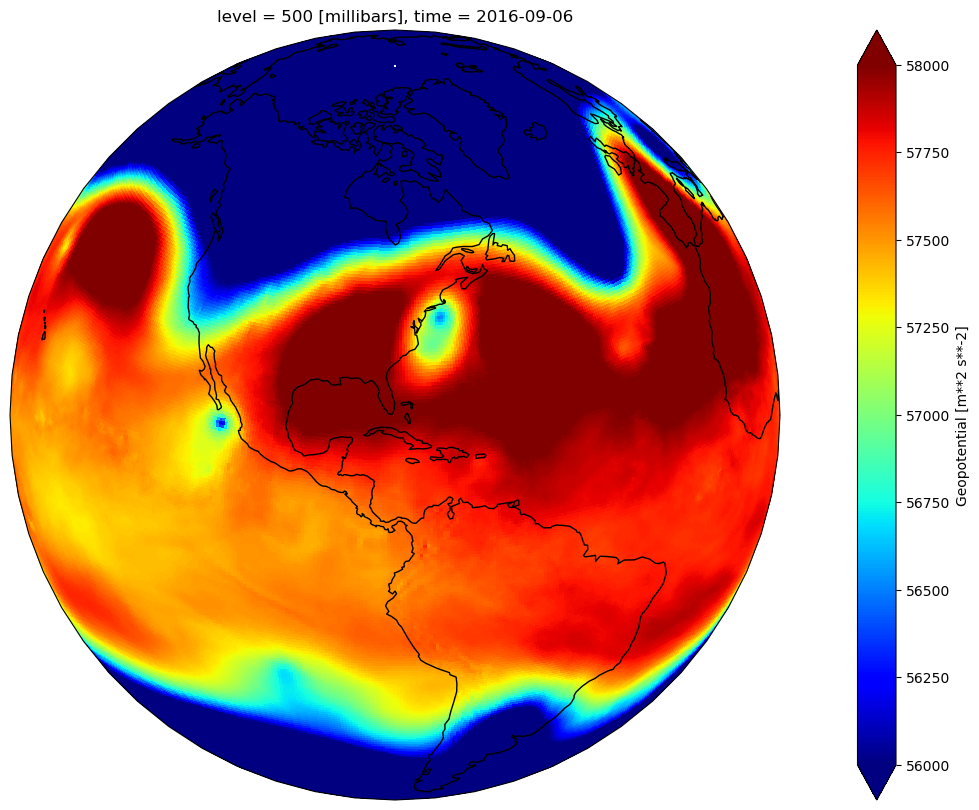

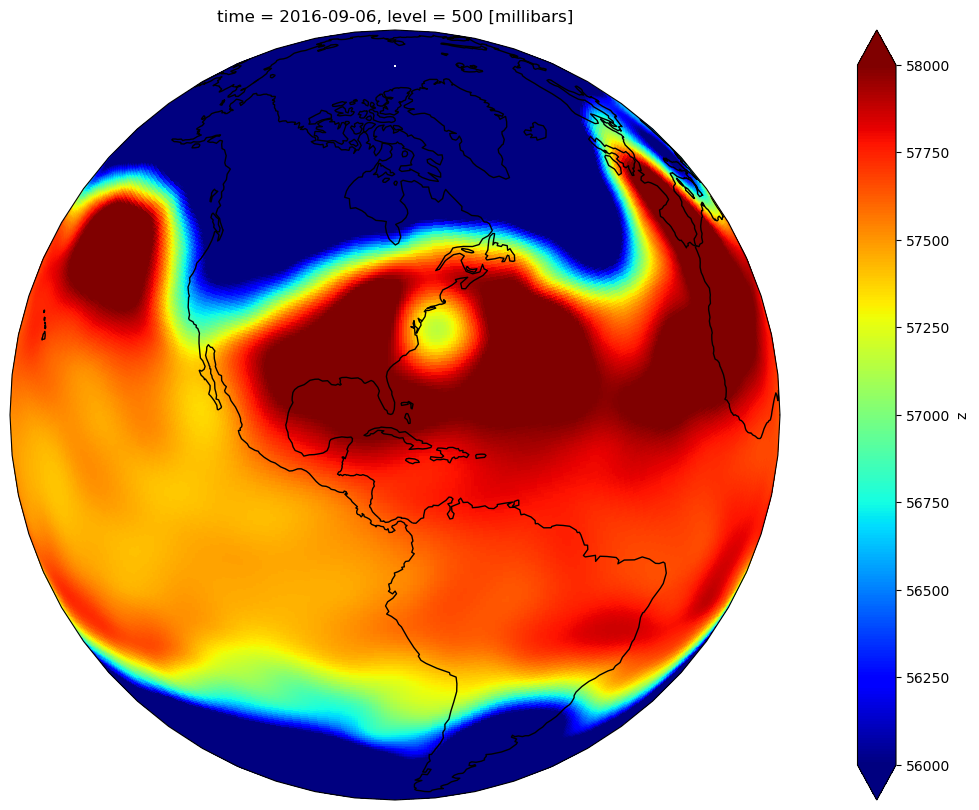

In [8]:
plot_map(dataset1, HERMINE_DATE, LEVEL, orthographic=True, lon=HERMINE_LON, lat=HERMINE_LAT)
plot_map(dataset1_comp, HERMINE_DATE, LEVEL, orthographic=True, lon=HERMINE_LON, lat=HERMINE_LAT)